In [27]:
# Biosignalsnotebooks python package
import biosignalsnotebooks as bsnb

# Scientific packages
from numpy import loadtxt, array, mean, logical_and, trapz
from scipy.signal import spectrogram, welch
import matplotlib.pyplot as plt
import pandas as pd

from utils.multitaper_spectogram_python import multitaper_spectrogram
#from .multitaper_spectrogram_python import multitaper_spectrogram
from IPython.display import display

In [28]:
dsi_filepath = "data/greg-eyesopeneyesclosed-11-29-21_raw.csv"

dsi_data = (-1)*pd.read_csv(dsi_filepath, skiprows=15)
print(dsi_data.columns)
display(dsi_data)


Index(['Time', 'P3', 'C3', 'F3', 'Fz', 'F4', 'C4', 'P4', 'Cz', 'CM', 'A1',
       'Fp1', 'Fp2', 'T3', 'T5', 'O1', 'O2', 'X3:', 'X2:', 'F7', 'F8', 'X1:',
       'A2', 'T6', 'T4', 'Trigger', 'Time_Offset', 'ADC_Status',
       'ADC_Sequence', 'Event', 'Comments'],
      dtype='object')


,Time,P3,C3,F3,Fz,F4,C4,P4,Cz,CM,...,X1:,A2,T6,T4,Trigger,Time_Offset,ADC_Status,ADC_Sequence,Event,Comments
0,-0.0033,9.9,4202.7,3179.4,2629.5,1722.3,-2273.4,3562.5,-445.8,3260.4,...,10.2,4505.4,5200.8,5321.7,0,-6,0,-249,0,
1,-0.0067,12.0,4191.9,3170.4,2621.7,1710.9,-2282.4,3553.5,-447.3,3482.7,...,9.9,4499.1,5195.4,5337.9,0,-12,0,-250,0,
2,-0.0100,-11.1,4157.7,3141.0,2595.0,1675.2,-2307.3,3527.7,-474.3,3927.3,...,9.9,4462.8,5163.0,5324.4,0,-18,0,-251,0,
3,-0.0133,-20.1,4155.0,3133.2,2589.3,1671.3,-2308.8,3530.4,-485.4,4223.7,...,10.2,4456.5,5160.6,5307.0,0,-24,0,-252,0,
4,-0.0167,10.2,4185.9,3158.7,2617.8,1712.4,-2286.6,3549.9,-463.5,3853.2,...,10.2,4488.0,5188.8,5319.3,0,-30,0,-253,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53986,-179.9561,1105.2,1603.5,2507.1,483.0,2865.6,428.1,3254.1,1983.3,2889.9,...,10.5,2777.4,3706.2,3681.0,0,-323921,0,-219,0,
53987,-179.9594,1078.8,1566.6,2469.6,446.1,2830.8,401.4,3216.3,1945.8,3038.1,...,10.2,2740.8,3678.0,3630.6,0,-323927,0,-220,0,
53988,-179.9628,1061.1,1553.7,2455.5,429.3,2813.1,378.9,3202.5,1931.7,3630.9,...,10.2,2720.7,3655.8,3608.4,0,-323933,0,-221,0,
53989,-179.9661,1070.1,1559.1,2465.1,440.4,2822.4,381.3,3202.5,1938.3,3705.0,...,10.2,2733.9,3658.8,3617.7,0,-323939,0,-222,0,


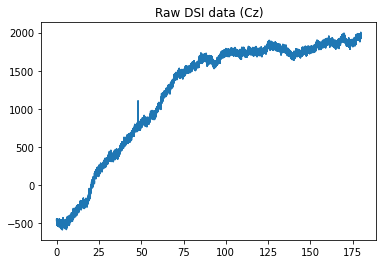

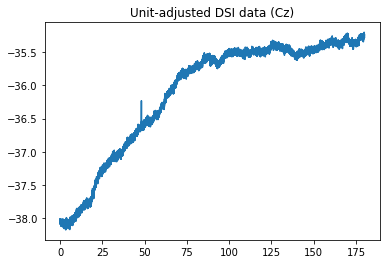

Multitaper Spectrogram Properties: 
     Spectral Resolution: 2.0Hz
     Window Length: 5.0s
     Window Step: 1.0s
     Time Half-Bandwidth Product: 5
     Number of Tapers: 9
     Frequency Range: 0-50Hz
     Detrend: linear


 Multitaper compute time: 0.36836889999995037 seconds


c:\Users\Jack Sullivan\Documents\GitHub\jupyter-notebooks\venv\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


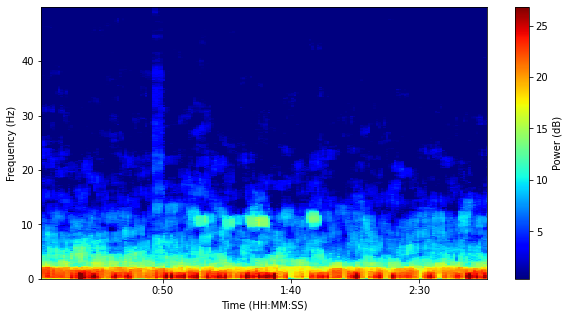

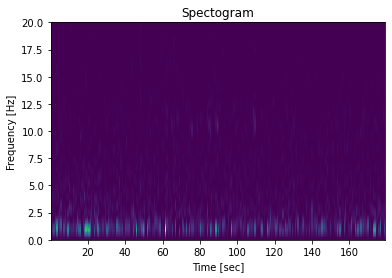

In [29]:
dsi_electrode = "Cz"
dsi_resolution = 16
dsi_sampling_rate = 300
dsi_gain = 60


dsi_uv = (((array(dsi_data[dsi_electrode]) / 2**dsi_resolution) - 0.5) * 3e6) / 40000

dsi_time_uv = bsnb.generate_time(dsi_uv, dsi_sampling_rate)
dsi_time = bsnb.generate_time(dsi_data[dsi_electrode], dsi_sampling_rate)

plt.title(f"Raw DSI data ({dsi_electrode})")
plt.plot(dsi_time, dsi_data[dsi_electrode])
plt.show()


plt.title(f"Unit-adjusted DSI data ({dsi_electrode})")
plt.plot(dsi_time_uv, dsi_uv)
plt.show()


spect, stimes, sfreqs = multitaper_spectrogram(array(dsi_data[dsi_electrode]), dsi_sampling_rate, frequency_range=[0, 50])

f, t, Sxx = spectrogram(dsi_uv, fs = dsi_sampling_rate, nfft = 2000)

plt.title("Spectogram")
plt.pcolormesh(t, f, Sxx)
plt.ylim([0, 20])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()